## Let's make sure we understand spherical harmonics and the spharm package

### Quick overview of (complex) spherical harmonics
In two dimensional space, the Fourier series can be arrived at by considering polymonials on a circle that are harmonic (ie the two-dimensional Laplacian of the polynomial equal to zero), homogenous (multiplicative scaling behaviour). The approach leads to trigonometric polynomials as the basis functions (i.e. linear combinations of two elements $\left[e^{im\theta}, e^{-im\theta}\right]$).

In a equivalent manner, Spherical Harmonics can be arrived at by considering homogeneous harmonic polynomials on a sphere. Separating the polynomials to comprise trigonometric polynomials in longitude (lines of fixed latitude are circles), leads to a set of Associated Legendre functions, $P_{n}^{m} \left(\cos{\phi}\right)$, of order $m$ and degree $n$, for each $m$. A disadvantage of this organisation is that it makes the poles into special points, but separating the variables is so useful that there are no competitive options.

That is, any real square-integrable function can be expressed as a series of spherical harmonic functions,
\begin{equation}
f\left(\phi,\theta\right) = \sum_{n=0}^{\infty} \sum_{m=-n}^{n} f_{n}^{m} Y_{n}^{m} \left(\phi,\theta\right) = \sum_{n=0}^{\infty} \sum_{m=-n}^{n} f_{n}^{m} \hat{P}_{n}^{m} \left(\cos{\phi}\right) e^{im\theta}.
\end{equation}
(Note, there is a $1/\sqrt{2\pi}$ that can appear in each of the various terms or outside the sum, depending on the derivation - see below and [1]). In the above, $f_{n}^{m}$ are the complex spectral harmonic coefficients of $f\left(\phi,\theta\right)$; $Y_{n}^{m}$ are the corresponding complex spherical harmonic functions; $\hat{P}_{n}^{m} \left(\cos{\phi}\right)$ are the normalised Associated Legendre functions; $m$ and $n$ are the spherical harmonic order and degree, respectively; $\phi$ and $\theta$ are the co-latitude and longitude, respectively.

The complex spherical harmonic functions possess a symmetry relationship for positive and negative angular orders,
\begin{equation}
Y_{n}^{m*} = \left(-1\right)^{m} Y_{n}^{-m}.
\end{equation}
In addition, if the function, $f\left(\phi,\theta\right)$, is entirely real, then the real and complex spherical harmonic coefficients are related by,
\begin{equation}
f_{n}^{m} =
    \begin{cases}
        \left( f_{nm} - i f_{n-m} \right) & \text{if } m > 0 \\
        f_{l0}                            & \text{if } m = 0 \\
        \left( -1 \right)^{m} f_{n}^{-m*} & \text{if } m < 0, \\
    \end{cases}
\end{equation}
where the use of only subscripts indicates the values from a real spectral harmonic analysis. Thus, it is not entirely necessary to save all coefficients - for example, I think `spharm` provides only coefficients for $m>0$.

### Discretizing the problem: quadrature
A quadrature is a rule for converting an integral into a sum:
\begin{equation}
\int_{-a}^{b} f \left(x\right) dx = \sum_{j=1}^{n} w_{j} f \left(x_j\right).
\end{equation}
For Legendre polynomials, Gaussian quadrature provides an exact quadrature for polynomials of degree less than 2N using only N points. One can also use true equispaced nodes in latitude, and these correspond to Chebychev nodes in x. The Chebychev nodes have several nice properties, but require twice as many points as the gaussian nodes. For trigonometric polynomials, the appropriate quadrature weights are all 1 and the quadrature points are an equispaced sampling. Thus, when evaulating Spherical Harmonics it is common to use N points in latitude with Gaussian spacing and weighting, and 2N points in longitude with equal spacing.

### Interpretation of spherical harmonics
Parseval’s theorem in Cartesian geometry relates the integral of a function squared to the sum of the squares of the function’s Fourier coefficients. This relation is easily extended to spherical geometry using the orthogonality properties of the spherical harmonic functions. Defining power to be the integral of the function squared divided by the area it spans, the total power of a function is equal to a sum over its power spectrum,
\begin{equation}
\frac{1}{4\pi}\int_{\Omega} |f|^2 \left(\phi, \theta\right) d\Omega = \sum_{n=0}^{\infty} S_{ff} \left(n\right),
\end{equation}
where $d\Omega$ is the differential surface area on the unit sphere (for $0 \leq \theta \leq 360$ and $0 \leq \phi \leq 180$, $d\Omega = \sin\phi d\phi d\theta$). For the most common form of spherical harmonic normalisation, $4\pi-normalisation$, the power spectrum, $S$, is related to the spectral harmonic coefficients by,
\begin{equation}
S_{ff}\left(n\right) = \sum_{m=-n}^{n} |f_{n}^{m}|^2.
\end{equation}
See reference [2] for other types of normalisation. If the function $f\left(\phi,\theta\right)$ has a zero mean, $S_{ff}\left(n\right)$ represents the contribution to the variance as a function of degree $n$. 

### `shparm`
The `spharm` package is a wrapper on UCAR's FORTRAN77 library `SPHEREPACK`. There is documentation on the latter [3] which notes the use of normalized Associated Legendre functions of the form,
\begin{equation}
\hat{P}_{n}^{m} = \sqrt{ \frac{2n + 1}{2} \frac{\left(n-m\right)!}{\left(n+m\right)!} } P_{n}^{m},
\end{equation}
whereas the typical $4\pi-normalized$ harmonics use,
\begin{equation}
\hat{P}_{n}^{m} = \sqrt{ \left(2n + 1\right) \frac{\left(n-m\right)!}{\left(n+m\right)!} } P_{n}^{m}.
\end{equation}
Thus, to convert to $4\pi-normalized$ harmonics, `spharm`/`SPHEREPACK` coefficients should be normalised by $1/\sqrt{2}$.

Additionally, the spherical harmonic decomposition in `SPHEREPACK` is defined as,
\begin{equation}
f\left(\phi,\theta\right) = \sum_{n=0}^{\infty} {\sum_{m=0}^{n}}^{'} f_{n}^{m} P_{n}^{m} e^{im\theta},
\end{equation}
where the prime notation on the sum indicates that the fist term corresponding to $m=0$ is multiplied by $1/2$. That is, `spharm` returns coefficients only for $m > 0$, where,
\begin{equation}
S_{ff}\left(n\right) = \left|\frac{f_{n}^{0}}{\sqrt{2}}\right|^2 + \sum_{m=1}^{n} 2\left|\frac{f_{n}^{m}}{\sqrt{2}}\right|^2.
\end{equation}

### References
[1] Nice overview: https://pdfs.semanticscholar.org/fcc6/5f4b2c626fb0b9685999d16a8b42799cd15b.pdf 

[2] `SHTools`: https://shtools.oca.eu/shtools/complex-spherical-harmonics.html and https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2018GC007529

[3] `SPHEREPACK`: https://www2.cisl.ucar.edu/resources/legacy/spherepack/documentation

In [1]:
import doppyo
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# In the following we'll compare and contrast spherical harmonics from the `spharm` and `SHtools` packages

In [2]:
import spharm
import pyshtools

# Spin up a cluster

In [3]:
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(walltime='09:00:00', cores=6, memory='36GB', job_extra=['--qos="express"'])

In [4]:
cluster.start_workers(n=5)

In [329]:
from dask.distributed import Client
client = Client(cluster)
client

Client Scheduler: tcp://152.83.81.91:35428 Dashboard: http://152.83.81.91:46118/status,Cluster Workers: 5 Cores: 30 Memory: 180.00 GB


# Helper functions

In [7]:
def similarize(da):
    """ 
        Make the various datasets look similar 
    """
    
    if 'g0_lon_2' in da.coords:
        da = da.rename({'g0_lon_2' : 'lon'})
    if 'g0_lon_3' in da.coords:
        da = da.rename({'g0_lon_3' : 'lon'})
    if 'g0_lat_1' in da.coords:
        da = da.rename({'g0_lat_1' : 'lat'})
    if 'g0_lat_2' in da.coords:
        da = da.rename({'g0_lat_2' : 'lat'})
    if 'initial_time0_hours' in da.coords:
        da = da.rename({'initial_time0_hours' : 'time'})
    
    da.time.values = [np.datetime64(str(time.year)+'-'+str(time.month).zfill(2)+'-'+str(time.day).zfill(2)) for time in da.time.values]
    
    return da

In [170]:
def get_Gaussian_grid(nlat, package='spharm'): 
    """
        Generate grid equally spaced in longitude with latitudes located at roots of ordinary Legendre polynomial \
        of degree nlat. 
        if package='spharms': The longitude grid is oriented from east to west, with the first point at the \
                Greenwich meridian and the last point at 360-delta degrees east (where delta = 360/nlon degrees). \
                Must be >= 4.The latitdude grid is oriented from north to south. If nlat is odd the equator is \
                included. If nlat is even the equator will lie half way between points points nlat/2 and (nlat/2)+1. \
                Must be >=3.
        if package='shtools': The latitudinal nodes correspond to the zeros of the Legendre polynomial of degree \
                lmax+1, and the longitudinal nodes are equally spaced with an interval of 360/(2*lmax+1) degrees.
    """
    if package == 'spharm':
        lat = spharm.gaussian_lats_wts(nlat)[0]
        lon = np.linspace(0,360,2*len(lat)+1)[0:-1]
    
    elif package == 'shtools':
        lat, lon = pyshtools.shtools.GLQGridCoord(nlat-1)
        
    else:
        raise InputError('Unrecognised package')
    
    return lat, lon

In [237]:
def get_regular_grid(nlat, package='spharm'): 
    """
        Generate grid equally spaced in longitude and latitude. 
        if package='spharms': The longitude grid is oriented from east to west, with the first point at the \
                Greenwich meridian and the last point at 360-delta degrees east (where delta = 360/nlon degrees). \
                Must be >= 4.The latitdude grid is oriented from north to south. If nlat is odd the equator is \
                included. If nlat is even the equator will lie half way between points points nlat/2 and (nlat/2)+1. \
                Must be >=3.
        if package='shtools': The grid is equally spaced and conforms to the sampling theorem of Driscoll and \
                Healy (1994). The first latitudinal band corresponds to 90 N, the latitudinal band for 90 S is not \
                included, and the latitudinal sampling interval is 180/n degrees. The first longitudinal band is 0 \
                E, the longitude band for 360 E is not included, and the longitudinal sampling interval is 360/n, \
                respectively.
    """
    if package == 'spharm':
        if nlat % 2 == 0:
            lat = np.linspace(90-90/nlat, -90+90/nlat, nlat)
        else:
            lat = np.linspace(90, -90, nlat)
        lon = np.linspace(0,360,2*len(lat)+1)[0:-1]
        return lat, lon
    
    elif package == 'shtools':
        lat = np.arange(90, -90, -180/nlat)
        lon = np.arange(0,360,180/nlat)
        
    else:
        raise InputError('Unrecognised package')
        
    return lat, lon

In [11]:
def interpolate_latlon(da, lon_des, lat_des):
    """
        Interpolate to specified latitude and longitude values, wrapping edges longitudinally and flipping edges latitudinally 
    """
    
    lat_name = doppyo.utils.get_lat_name(da)
    lon_name = doppyo.utils.get_lon_name(da)
    
    # Wrap longitudes at egdes-----
    da_minlon = da.isel({lon_name : 0})
    minlon = da_minlon[lon_name]
    da_maxlon = da.isel({lon_name : -1})
    maxlon = da_maxlon[lon_name]
    da_minlon[lon_name] = minlon + 360
    da_maxlon[lon_name] = maxlon - 360
    da_lonwrap = xr.concat([da_maxlon, da, da_minlon], dim=lon_name)
    
    # Flip latitudes at edges -----
    da_minlat = da_lonwrap.isel({lat_name : 0})
    minlat = da_minlat[lat_name] 
    da_maxlat = da_lonwrap.isel({lat_name : -1})
    maxlat = da_maxlat[lat_name]
    da_minlat[lat_name] = maxlat - 180
    da_maxlat[lat_name] = minlat + 180
    da_wrap = xr.concat([da_minlat, da_lonwrap, da_maxlat], dim=lat_name).chunk({lon_name:-1, lat_name:-1})
    
    return da_wrap.interp({lon_name : lon_des, lat_name : lat_des})

In [12]:
def get_area_weights(lon, lat):
    """
        Get area weights, wrapping edges longitudinally and flipping edges latitudinally 
    """
    
    lat_name = doppyo.utils.get_lat_name(lat)
    lon_name = doppyo.utils.get_lon_name(lon)
    
    dlon = lon.diff(lon_name) / 2
    minlon = lon.isel({lon_name:0})-dlon.isel({lon_name:0})
    minlon[lon_name] = minlon.values
    maxlon = lon.isel({lon_name:-1})+dlon.isel({lon_name:-1})
    maxlon[lon_name] = maxlon.values
    midlon = lon.isel({lon_name:slice(0,-1)})+dlon.values
    midlon[lon_name] = midlon.values
    lonb = xr.concat([minlon, midlon, maxlon], dim=lon_name)
    
    dlat = lat.diff(lat_name) / 2
    minlat = lat.isel({lat_name:0})-dlat.isel({lat_name:0})
    minlat[lat_name] = minlat.values
    maxlat = lat.isel({lat_name:-1})+dlat.isel({lat_name:-1})
    maxlat[lat_name] = maxlat.values
    midlat = lat.isel({lat_name:slice(0,-1)})+dlat.values
    midlat[lat_name] = midlat.values
    latb = xr.concat([minlat, midlat, maxlat], dim=lat_name)

    xb, yb = doppyo.utils.xy_from_lonlat(lonb,latb)
    dxb = abs(xb.diff(lon_name))
    dyb = abs(yb.diff(lat_name))
    area = dxb * dyb
    area[lon_name] = lon.values
    area[lat_name] = lat.values
    
    return area

In [129]:
def get_spharm_coefficients(da, gridtype, ntrunc=None):
    """
        Returns complex spherical harmonic coefficients resulting from the spherical harmonic analysis \
                of da using spharm package
        
        | Author: Dougie Squire
        | Date: 26/07/2017
        
        Parameters
        ----------
        da : xarray DataArray
            Array to use to compute spherical harmonics. Must contain at least latitude and longitude \
                    dimensions, with either regular or Gaussian gridding. 
        gridtype : "gaussian" or "regular"
            Grid type of da
        ntrunc : int, optional
            Spectral truncation limit
            
        Returns
        -------
        coefficients : xarray DataArray
            Array containing the complex spectral harmonic coefficients, where n is the longitudinal \
            wavenumber and m is the latitudinal wavenumber
    """
    
    def _convert_spharm_1d_to_2d(spharm_1D, ntrunc):
        """
            Unpack 1D sperical harmonic output from spharm package. Coefficients are ordered so that first \
            (nm=0) is m=0,n=0, second is m=0,n=1, nm=ntrunc is m=0,n=ntrunc, nm=ntrunc+1 is m=1,n=1, etc.
        """
        
        if spharm_1D.ndim == 2:
            spharm_2D = np.array(np.zeros((ntrunc+1,ntrunc+1,spharm_1D.shape[1]), dtype=np.complex64))
            for t in range(0,spharm_1D.shape[1]):
                pos=0
                for m in range(0, ntrunc):
                    for n in range(m, ntrunc+1):
                        spharm_2D[m,n,t]=spharm_1D[pos,t] / np.sqrt(2)
                        pos+=1
        else:
            spharm_2D = np.array(np.zeros((ntrunc+1,ntrunc+1), dtype=np.complex64))
            pos=0
            for m in range(0, ntrunc):
                for n in range(m, ntrunc+1):
                    spharm_2D[m,n]=spharm_1D[pos] / np.sqrt(2)
                    pos+=1

        return spharm_2D
    
    lat_name = doppyo.utils.get_lat_name(da)
    lon_name = doppyo.utils.get_lon_name(da)

    nlat = len(da[lat_name])
    nlon = len(da[lon_name])
    spharmt = spharm.Spharmt(nlat=nlat, nlon=nlon, gridtype=gridtype)

    # Stack along everything but the lat and lon dimensions -----
    other_dims = doppyo.utils.get_other_dims(da, [lat_name,lon_name])
    if len(other_dims) > 1:
        da = da.stack(other_dims=other_dims).transpose(*[lat_name, lon_name, 'other_dims'])
    else:
        da = da.transpose(*[lat_name,lon_name, *other_dims])

    if ntrunc is None:
        ntrunc = nlat - 1
    spharm_1D = spharmt.grdtospec(da.values, ntrunc=ntrunc)

    spharm_2D = _convert_spharm_1d_to_2d(spharm_1D, ntrunc)

    coords=dict(da.coords.items())
    coords.pop('lat', None)
    coords.pop('lon', None)
    coords['m'] = np.arange(0,ntrunc+1)
    coords['n'] = np.arange(0,ntrunc+1)

    if len(other_dims) > 1:
        return xr.DataArray(spharm_2D, dims=['m','n', 'other_dims'], coords=coords).unstack('other_dims').rename('coefficients')
    else:
        return xr.DataArray(spharm_2D, dims=['m','n', *other_dims], coords=coords).rename('coefficients')

In [193]:
def get_shtools_coefficients(da, gridtype, ntrunc=None):
    """
        Returns complex spherical harmonic coefficients resulting from the spherical harmonic analysis \
                of da using SHtools package
        
        | Author: Dougie Squire
        | Date: 26/07/2017
        
        Parameters
        ----------
        da : xarray DataArray
            Array to use to compute spherical harmonics. Must contain at least latitude and longitude \
                    dimensions, with either regular or Gaussian gridding.
        gridtype : "gaussian" or "regular"
            Grid type of da
        ntrunc : int, optional
            Spectral truncation limit
            
        Returns
        -------
        coefficients : xarray DataArray
            Array containing the complex spectral harmonic coefficients, where n is the longitudinal \
            wavenumber and m is the latitudinal wavenumber
    """
    
    lat_name = doppyo.utils.get_lat_name(da)
    lon_name = doppyo.utils.get_lon_name(da)

    nlat = len(da[lat_name])
    nlon = len(da[lon_name])

    # Stack along everything but the lat and lon dimensions -----
    other_dims = doppyo.utils.get_other_dims(da, [lat_name,lon_name])
    if len(other_dims) > 0:
        raise ValueError('shtools cannot deal with more than just lat and lon dimensions')
    da = da.transpose(*[lat_name,lon_name])

    if ntrunc is None:
        ntrunc = int(nlat/2) - 1
    
    if gridtype == 'regular':
        shtools_2D = pyshtools.expand.SHExpandDHC(da, sampling=2, lmax_calc=ntrunc)
    elif gridtype == 'gaussian':
        zero, w = pyshtools.shtools.SHGLQ(len(da[lat_name])-1)
        shtools_2D = pyshtools.expand.SHExpandGLQC(da, w=w, zero=zero, lmax_calc=ntrunc)
    else:
        raise InputError('Unrecognised gridtype')

    shtools_2D = np.concatenate((np.flip(shtools_2D[1][:,1:], axis=1),shtools_2D[0]), axis=1)

    coords=dict(da.coords.items())
    coords.pop('lat', None)
    coords.pop('lon', None)
    coords['m'] = np.arange(-ntrunc,ntrunc+1)
    coords['n'] = np.arange(0,ntrunc+1)

    return xr.DataArray(shtools_2D, dims=['n','m'], coords=coords).rename('coefficients')

In [250]:
def get_power(coeffs, package='spharm'):
    """
        Return the power, S(n), given the spherical harmonic coefficients computed using either spharm or shtools
    """
    
    if package == 'spharm':
        return xr.concat([(abs(coeffs) ** 2).sel(m=0), 
                          2*(abs(coeffs) ** 2).sel(m=slice(1,len(coeffs.m)+1))], dim='m').sum('m')
    elif package == 'shtools':
        return (abs(coeffs) ** 2).sum('m')
    else:
        raise InputError('Unrecognised package')

# Load some reshuffled CAFE60 data

In [22]:
realm = 'atmos_isobaric'
variable = 't_surf'
cafe_directory = '/OSM/CBR/OA_DCFP/data3/model_output/CAFE/data_assimilation/CAFE60/short/v14/tok599/cm-runs/CAFE-60-reshuffle/'

cafe_raw = similarize(xr.open_mfdataset(cafe_directory + realm + '/' + variable + '*19680101*', parallel=True, use_cftime=True)[variable])

#### Interpolate onto Gaussian and Regular grid

In [238]:
lat_Gaussian_spharm, lon_Gaussian_spharm = get_Gaussian_grid(len(cafe_raw.lat), package='spharm')
lat_Gaussian_shtools, lon_Gaussian_shtools = get_Gaussian_grid(len(cafe_raw.lat), package='shtools')
lat_regular_spharm, lon_regular_spharm = get_regular_grid(len(cafe_raw.lat), package='spharm')
lat_regular_shtools, lon_regular_shtools = get_regular_grid(len(cafe_raw.lat), package='shtools')

cafe_Gaussian_spharm = interpolate_latlon(cafe_raw, lon_Gaussian_spharm, lat_Gaussian_spharm)
cafe_Gaussian_shtools = interpolate_latlon(cafe_raw, lon_Gaussian_shtools, lat_Gaussian_shtools)
cafe_regular_spharm = interpolate_latlon(cafe_raw, lon_regular_spharm, lat_regular_spharm)
cafe_regular_shtools = interpolate_latlon(cafe_raw, lon_regular_shtools, lat_regular_shtools)

# Can we integrate the coefficients to get the power and integrate the power to get the variance

### Subtract the mean and keep only the first day

In [239]:
f_Gaussian_spharm = cafe_Gaussian_spharm.isel(time=0).mean('ensemble').transpose('lat','lon')
f_Gaussian_spharm = (f_Gaussian_spharm - doppyo.utils.average(f_Gaussian_spharm, dim=['lat','lon'], 
                                                            weights=get_area_weights(f_Gaussian_spharm.lon, 
                                                                                     f_Gaussian_spharm.lat))).squeeze()

f_Gaussian_shtools = cafe_Gaussian_shtools.isel(time=0).mean('ensemble').transpose('lat','lon')
f_Gaussian_shtools = (f_Gaussian_shtools - doppyo.utils.average(f_Gaussian_shtools, dim=['lat','lon'], 
                                                              weights=get_area_weights(f_Gaussian_shtools.lon, 
                                                                                       f_Gaussian_shtools.lat))).squeeze()

f_regular_spharm = cafe_regular_spharm.isel(time=0).mean('ensemble').transpose('lat','lon')
f_regular_spharm = (f_regular_spharm - doppyo.utils.average(f_regular_spharm, dim=['lat','lon'], 
                                                            weights=get_area_weights(f_regular_spharm.lon, 
                                                                                     f_regular_spharm.lat))).squeeze()

f_regular_shtools = cafe_regular_shtools.isel(time=0).mean('ensemble').transpose('lat','lon')
f_regular_shtools = (f_regular_shtools - doppyo.utils.average(f_regular_shtools, dim=['lat','lon'], 
                                                              weights=get_area_weights(f_regular_shtools.lon, 
                                                                                       f_regular_shtools.lat))).squeeze()

### Compute the `spharm` coefficients

In [316]:
fnm_Gaussian_spharm = get_spharm_coefficients(f_Gaussian_spharm, gridtype='gaussian', ntrunc=44)
fnm_regular_spharm = get_spharm_coefficients(f_regular_spharm, gridtype='regular', ntrunc=44)

### Compute the `pyshtools` coefficients

In [242]:
fnm_Gaussian_shtools = get_shtools_coefficients(f_Gaussian_shtools, gridtype='gaussian', ntrunc=44)
fnm_regular_shtools = get_shtools_coefficients(f_regular_shtools, gridtype='regular', ntrunc=44)

# How do the coefficients compare?

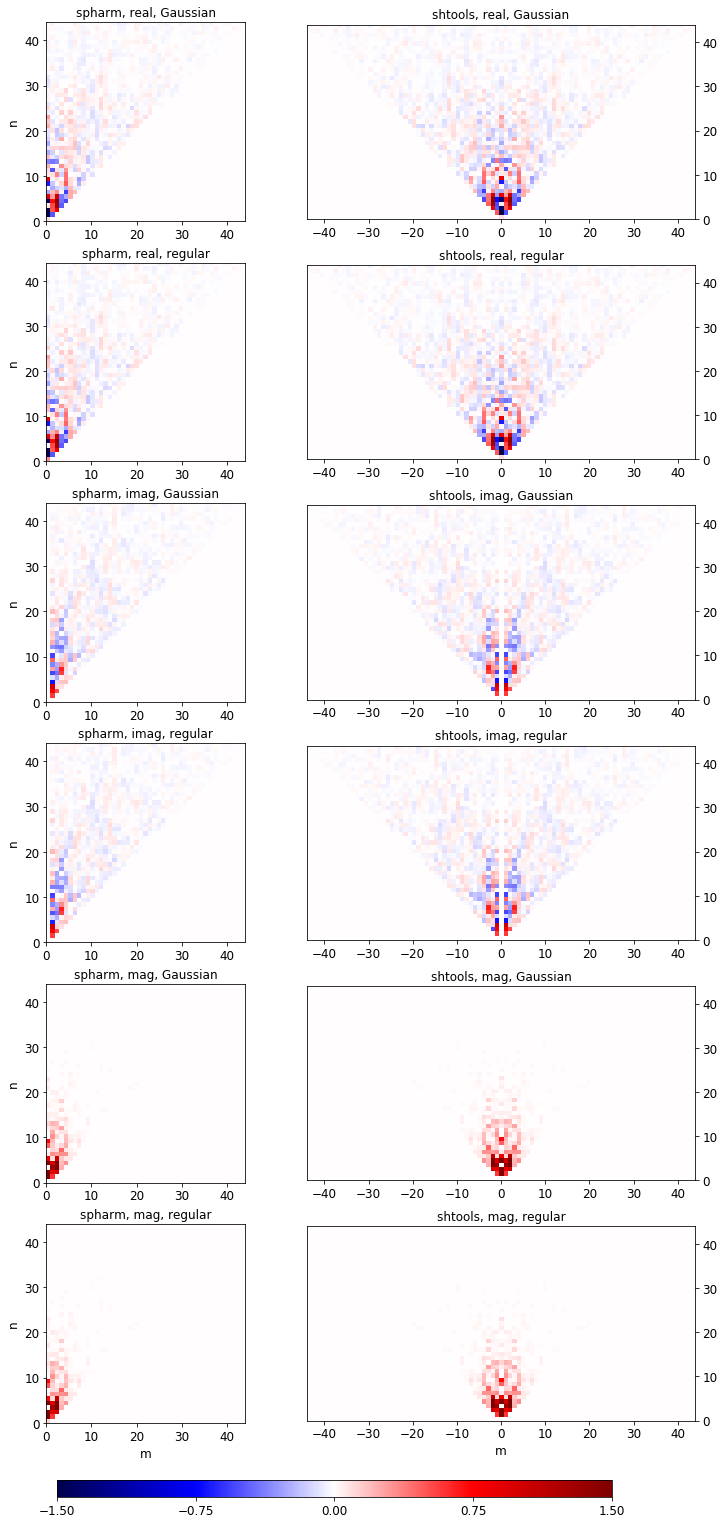

In [317]:
data = [fnm_Gaussian_spharm.real.T, fnm_Gaussian_shtools.real, 
        fnm_regular_spharm.real.T, fnm_regular_shtools.real,
        fnm_Gaussian_spharm.imag.T, fnm_Gaussian_shtools.imag, 
        fnm_regular_spharm.imag.T, fnm_regular_shtools.imag,
        abs(fnm_Gaussian_spharm.T)**2, abs(fnm_Gaussian_shtools)**2, 
        abs(fnm_regular_spharm.T)**2, abs(fnm_regular_shtools)**2]
headings = ['spharm, real, Gaussian','shtools, real, Gaussian',
            'spharm, real, regular', 'shtools, real, regular',
            'spharm, imag, Gaussian','shtools, imag, Gaussian',
            'spharm, imag, regular', 'shtools, imag, regular',
            'spharm, mag, Gaussian','shtools, mag, Gaussian',
            'spharm, mag, regular', 'shtools, mag, regular']
plot_fields(data, headings=headings, vlims=[-1.5,1.5], cmaps='seismic', shift_cbar=1.08, squeeze_cbar=0.5)

# How do the power spectra compare?

In [318]:
Sff_Gaussian_spharm = get_power(fnm_Gaussian_spharm, package='spharm')
Sff_Gaussian_shtools = get_power(fnm_Gaussian_shtools, package='shtools')
Sff_regular_spharm = get_power(fnm_regular_spharm, package='spharm')
Sff_regular_shtools = get_power(fnm_regular_shtools, package='shtools')

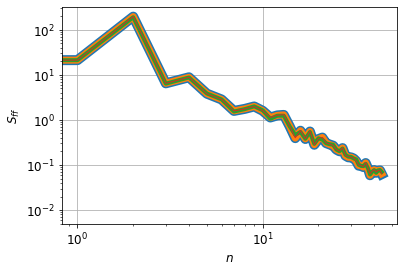

In [338]:
fig, ax = plt.subplots(1, 1)

ax.plot(Sff_Gaussian_spharm.n, Sff_Gaussian_spharm, linewidth=10, label='spharm, Gaussian')
ax.plot(Sff_Gaussian_shtools.n, Sff_Gaussian_shtools, linewidth=7, label='shtool, Gaussian')
ax.plot(Sff_regular_spharm.n, Sff_regular_spharm, linewidth=4, label='spharm, regular')
ax.plot(Sff_regular_shtools.n, Sff_regular_shtools, linewidth=1, label='shtool, regular')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$n$')
ax.set_ylabel('$S_{ff}$')
ax.grid(True)

# Do these sum to the variance?

In [334]:
var_Gaussian_spharm = doppyo.utils.average(f_Gaussian_spharm**2, dim=['lat','lon'], 
                                           weights=get_area_weights(f_Gaussian_spharm.lon,
                                                                    f_Gaussian_spharm.lat)).compute()
var_Gaussian_shtools = doppyo.utils.average(f_Gaussian_shtools**2, dim=['lat','lon'], 
                                            weights=get_area_weights(f_Gaussian_shtools.lon,
                                                                     f_Gaussian_shtools.lat)).compute()
var_regular_spharm = doppyo.utils.average(f_regular_spharm**2, dim=['lat','lon'], 
                                          weights=get_area_weights(f_regular_spharm.lon,
                                                                   f_regular_spharm.lat)).compute()
var_regular_shtools = doppyo.utils.average(f_regular_shtools**2, dim=['lat','lon'], 
                                           weights=get_area_weights(f_regular_shtools.lon,
                                                                    f_regular_shtools.lat)).compute()

Text(0, 0.5, '$\\sum f_{n}^{m}$ (front), $var$ (back)')

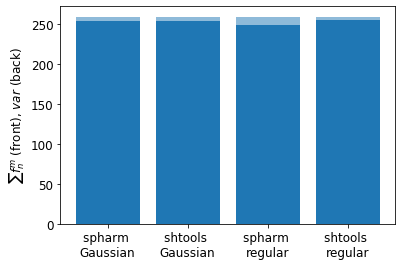

In [356]:
fig, ax = plt.subplots(1, 1)

ax.bar(0,var_Gaussian_spharm, color='C0', alpha=0.5)
ax.bar(0,Sff_Gaussian_spharm.sum('n'), color='C0')
ax.bar(1,var_Gaussian_shtools, color='C0', alpha=0.5)
ax.bar(1,Sff_Gaussian_shtools.sum('n'), color='C0')
ax.bar(2,var_regular_spharm, color='C0', alpha=0.5)
ax.bar(2,Sff_regular_spharm.sum('n'), color='C0')
ax.bar(3,var_regular_shtools, color='C0', alpha=0.5)
ax.bar(3,Sff_regular_shtools.sum('n'), color='C0')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['spharm \nGaussian','shtools \nGaussian','spharm \nregular','shtools \nregular'])
ax.set_ylabel('$\sum f_{n}^{m}$ (front), $var$ (back)')